In [2]:
from qiskit import QuantumCircuit, execute, Aer
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def plot_bloch_vector(statevector):
    bloch_vector = np.zeros((3,))
    bloch_vector[0] = 2 * np.real(statevector[0]) - 1
    bloch_vector[1] = 2 * np.imag(statevector[0])
    bloch_vector[2] = 2 * np.real(statevector[1]) - 1
    return bloch_vector

def plot_bloch_sphere(statevector):
    bloch_vector = plot_bloch_vector(statevector)
    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlim([-1, 1])
    ax.set_ylim([-1, 1])
    ax.set_zlim([-1, 1])
    ax.quiver(0, 0, 0, bloch_vector[0], bloch_vector[1], bloch_vector[2], color='red')
    plt.show()

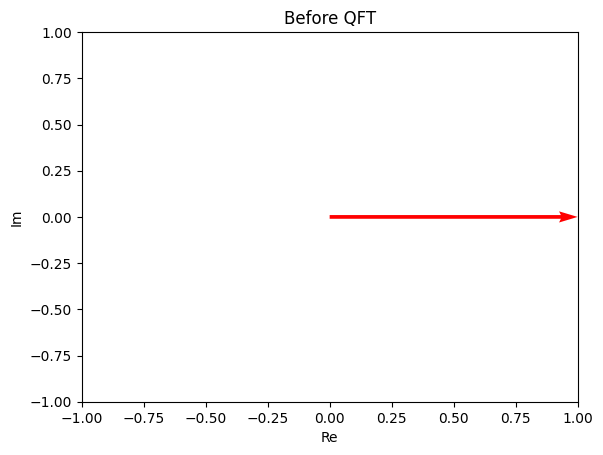

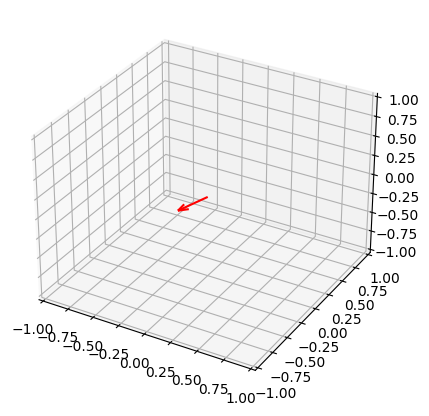

In [5]:
# Define the number of qubits and the circuit
num_qubits = 3
qc = QuantumCircuit(num_qubits)

# Plot the initial statevector
statevector = execute(qc, Aer.get_backend('statevector_simulator')).result().get_statevector()
fig, ax = plt.subplots()
ax.quiver(0, 0, np.real(statevector[0]), np.imag(statevector[0]), angles='xy', scale_units='xy', scale=1, color='red')
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_xlabel('Re')
ax.set_ylabel('Im')
ax.set_title('Before QFT')
plt.show()

# Apply the Quantum Fourier Transform
for j in range(num_qubits):
    for k in range(j):
        # qc.cu1(np.pi/float(2**(j-k)), k, j)
        qc.cp(np.pi/float(2**(j-k)), k, j)  # This works identically too except without giving any warnings
    qc.h(j)

# Execute the circuit on the statevector simulator
backend = Aer.get_backend('statevector_simulator')
statevector = execute(qc, backend).result().get_statevector()

# Plot the resulting Bloch sphere
plot_bloch_sphere(statevector)


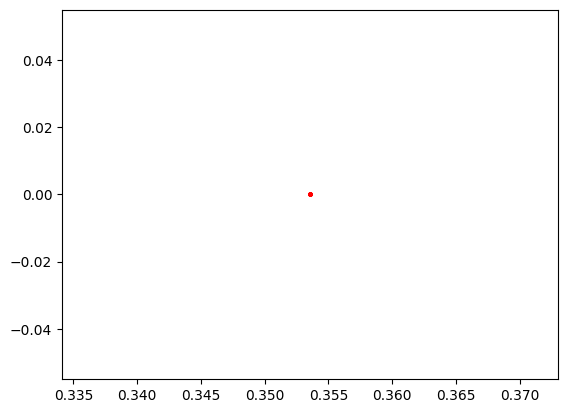

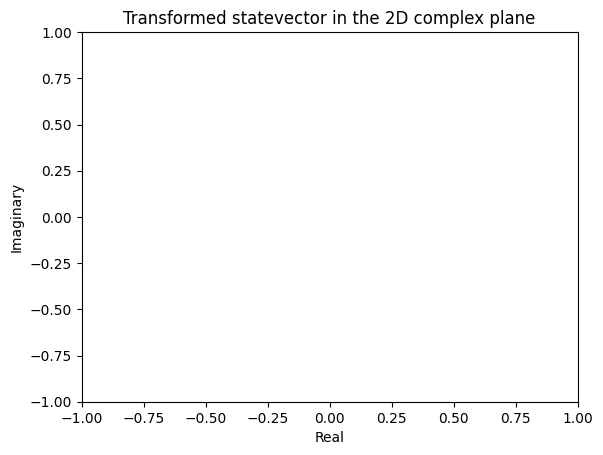

In [7]:
# Plot the statevector in the 2D complex plane
# plt.scatter(qft_state.real, qft_state.imag)
plt.show()
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.title('Transformed statevector in the 2D complex plane')
plt.show()
